# Naive K-Means

### Description: 
This code example consists of a naive implementation of the popular Unsupervised Learning Algorithm for Cluster Analysis K-Means

## Project: 
[r-examples](https://github.com/garciparedes/r-examples)

## Author: 
[Sergio García Prado](garciparedes.me)

### Date: 
2017-12

In [1]:
rm(list = ls())

In [2]:
naiveKmeans <- function(data, k, tol = 0.01) {
  
  distance <- function(centers, data) {
    distances <- matrix(rep(0,3 * dim(data)[1]), ncol = dim(centers)[1])
    for (i in 1:dim(centers)[1]) {
      distances[,i] <- sqrt(colSums((centers[i,] - t(data))^2))
    }
    return(distances)
  }
  
  train <- function(data, k, tol) {
    ranges <- sapply(data, range)
    coordinates <- runif(dim(ranges)[2] * k, min=ranges[1,], max=ranges[2,])
    centers <- t(matrix(data = (coordinates), ncol = k))
    colnames(centers) <- colnames(data)
    distance <-  distance(centers, data)
    dataClass <- apply(distance, 1,which.min)
    reached=FALSE
    while (reached == FALSE) {
      for (i in 1:k) {
        centers[i,] = colMeans(data[dataClass == i,], na.rm = TRUE)
      }
      newDistance <-  distance(centers, data)
      newDataClass <- apply(distance, 1,which.min)
      if ((sum(newDataClass != dataClass) / dim(data)[1]) < tol){
        reached = TRUE
      }
    }
    return(centers)
  }
  
  centers <- train(data, k, tol)

  predict <- function(data) {
    distance <-  distance(centers, data)
    dataClass <- apply(distance, 1,which.min)
    names(dataClass) <- 1:dim(data)[1]
    return(dataClass)
  }

  value <- list(centers = centers, predict = predict)
  class(value) <- "naiveKmeans"
  return(value)
}

predict.naiveKmeans <- function(obj, data) {
  return(obj$predict(data))
}

X1,X2
2.968705,-20.001872
-2.882005,-2.262006
8.967468,7.040135


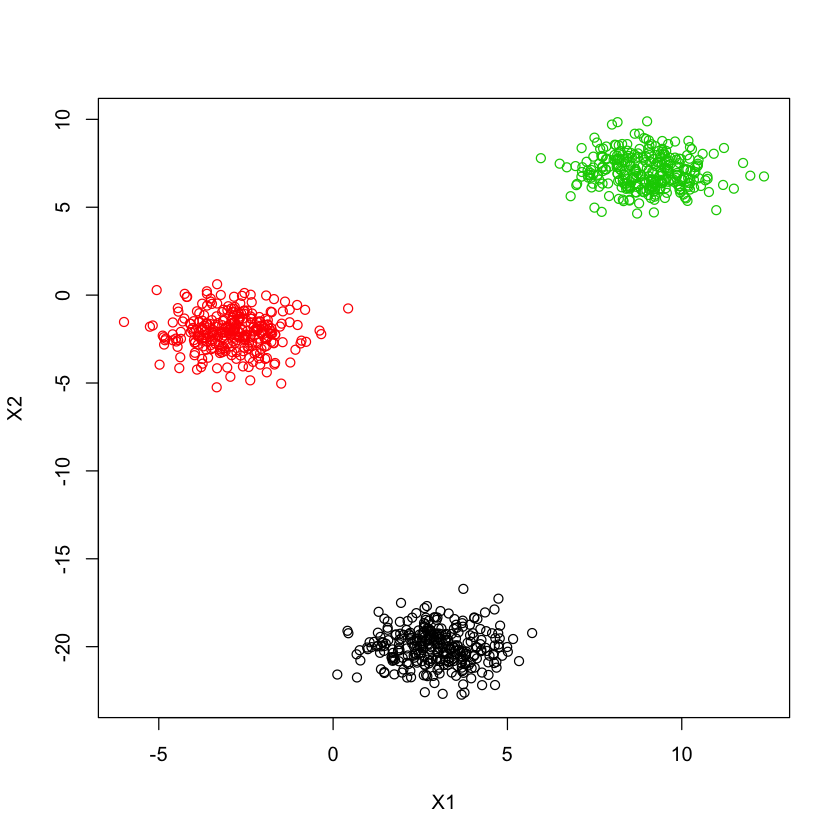

In [3]:
# Spherical and Normal Dataset
n <- 300
data <- data.frame(rbind(
  cbind(rnorm(n, 3), rnorm(n,-20)),
  cbind(rnorm(n, 9), rnorm(n,7)), 
  cbind(rnorm(n, -3), rnorm(n,-2))
))
data.kmeans <- naiveKmeans(data, 3)
data.kmeans$centers
plot(data, col = predict(data.kmeans, data))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
6.820000,2.930000,5.547500,1.860000
5.168056,3.163889,2.204167,0.525000
6.094737,2.989474,4.818421,1.781579


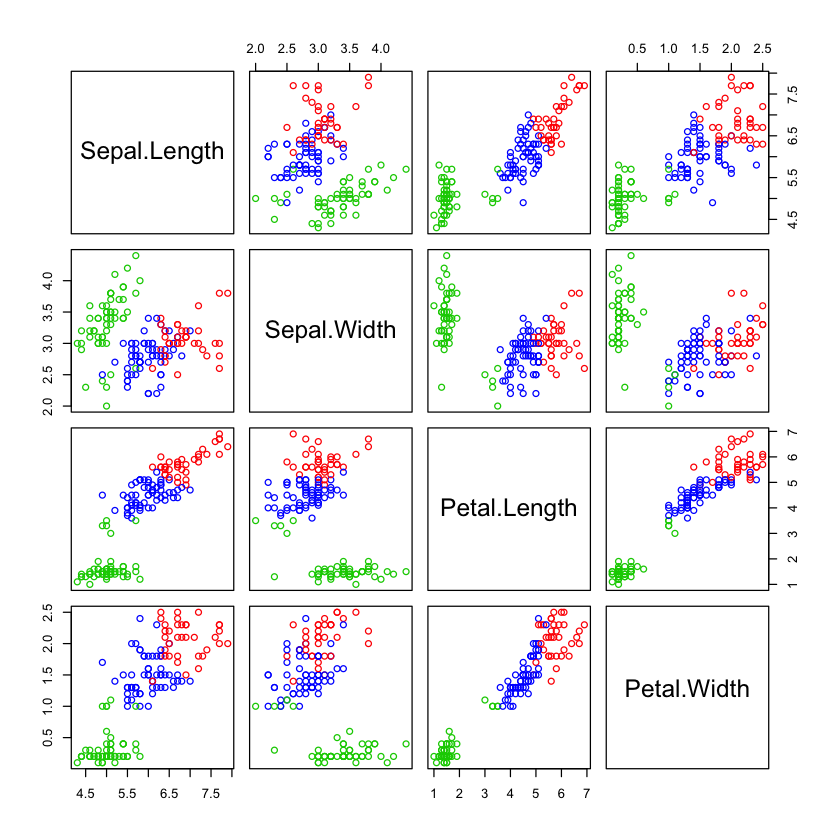

In [4]:
# Iris Dataset
data(iris)
iris.use <- iris[,1:4]
iris.kmeans <- naiveKmeans(iris.use, 3)
iris.kmeans$centers
pairs(iris.use, col = predict(iris.kmeans, iris.use) + 1 )